# Lab 2.1: Radar Range Equation

In [1]:
%matplotlib widget
import rad.css as css
import rad.example as ex
import rad.quiz as qz
from rad.const import c, k
from rad.radar import to_db, from_db, deg2rad, rad2deg
from math import sqrt, sin, asin, cos, acos, tan, atan2, pi, log, log10
css.add_custom_css()

**Reminders**: 

- Hit the *<font color="DarkBlue">Run All</font>* button <img width="18px" src="img/run_all_icon.png"> button above before continuing
- Useful formulae and definitions are available in [Reference](Reference.ipynb)

In the previous lesson, we saw how to use a ranging sensor to find targets and coarsely estimate their range and angle. One major step in this process was **detection**, or the acknowledgement that an target echo has been received. In real radar systems, detection is complicated by the fact that there is, inevitably, noise in the system. This means for an echo to be detectable, its strength needs to be greater than the strength of the noise.

Below you can see a notional received signal with an echo (in **black**) located at a delay of $\tau = 50~\mathrm{ms}$ and noise (in **<font color="Red">red</font>**). The echo is very strong compared to the noise, so we can say with confidence that an echo has been received at the moment. 

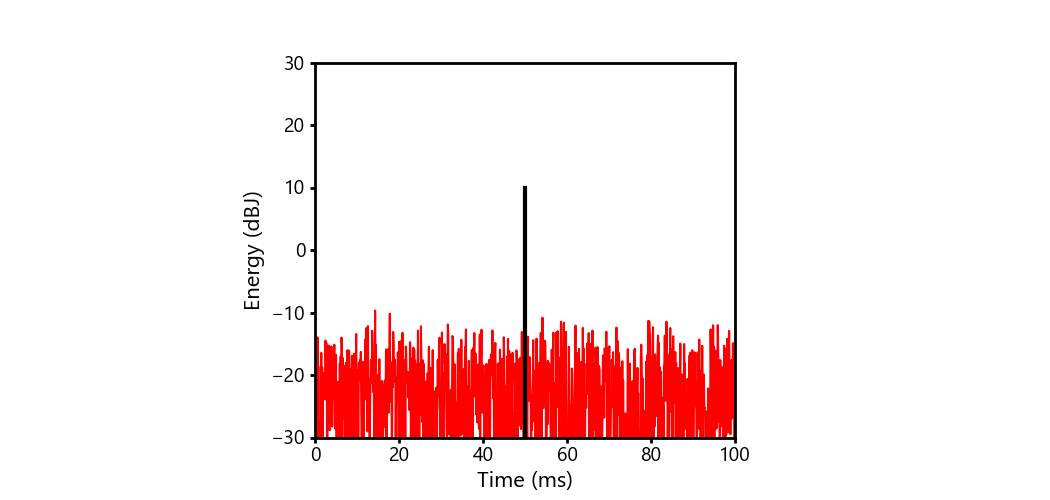

In [2]:
ex.ex_2_1_1a()

However, in the following plot, the echo is about the same strength as the noise. In this case, it will be very difficult to say with certainty that there was a detection for the second echo.

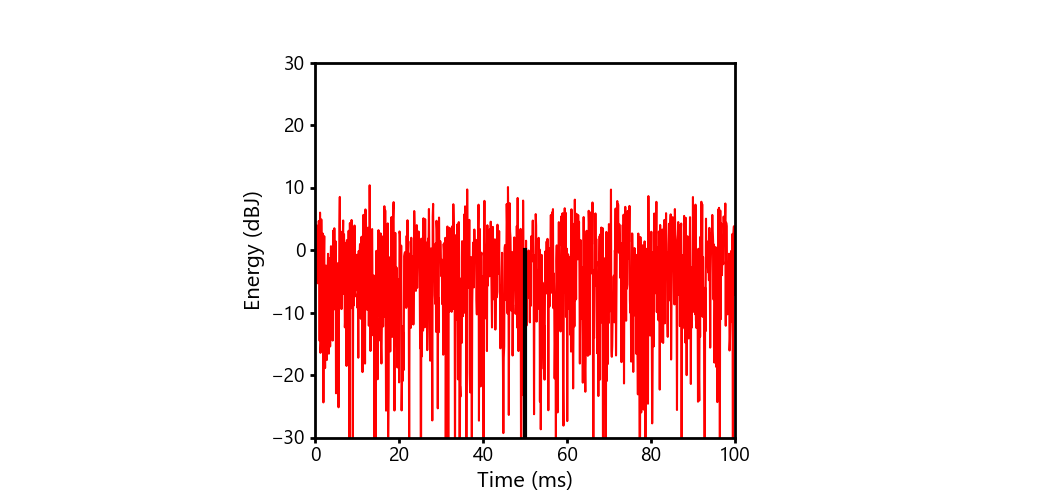

In [3]:
ex.ex_2_1_1b()

In this section, we will talk about how to calculate the strength of the target echo along with the strength of the noise; this allows us to know under what circumstances we can expect to find targets. For instance, if we have an inexpensive system with very powerful noise, we can expect it to be difficult to find any echoes except those that are very strong. The actual process of detection will be covered in [Lab 3.2: Detection](3_2_Detection.ipynb).

## Signal-to-Noise Ratio

The most common way to quantify how strong a signal is compared to noise is the **signal-to-noise ratio**<sup>[1](#foot_snr)</sup> (SNR). This is defined as

$$
\mathrm{SNR}=\frac{\mathrm{Signal~Energy}}{\mathrm{Average~Noise~Energy}} 
$$

Echoes with *high* SNR will be easy to detect, echoes with *low* SNR will be difficult to discern from the noise. In fact, SNR is a very important measure across many fields of engineering, e.g., communications, sensing. You will tend to see it any time there is some signal of interest that is trying to be estimated in the presence of noise. Note that the noise energy term is an average value because noise is inherently random and will not have a constant energy. 

**Note:** Energy is measured in joules ($\mathrm{J}$), and SNR is a unitless value that is most often presented in decibels ($\mathrm{dB}$).

Below is an interactive plot showing different example received signals where you can change the signal energy and the noise energy (the noise is drawn randomly). Try this:

- Single-click the *<font color="DarkBlue">Noise Energy</font>* slider to select it
- Tap the right arrow on your keyboard to slowly increase the noise energy

As you watch the noise energy increase and SNR decrease, try and get a feel for where it would start being difficult to confidently separate the signal from the noise. 

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=-20.0, d…

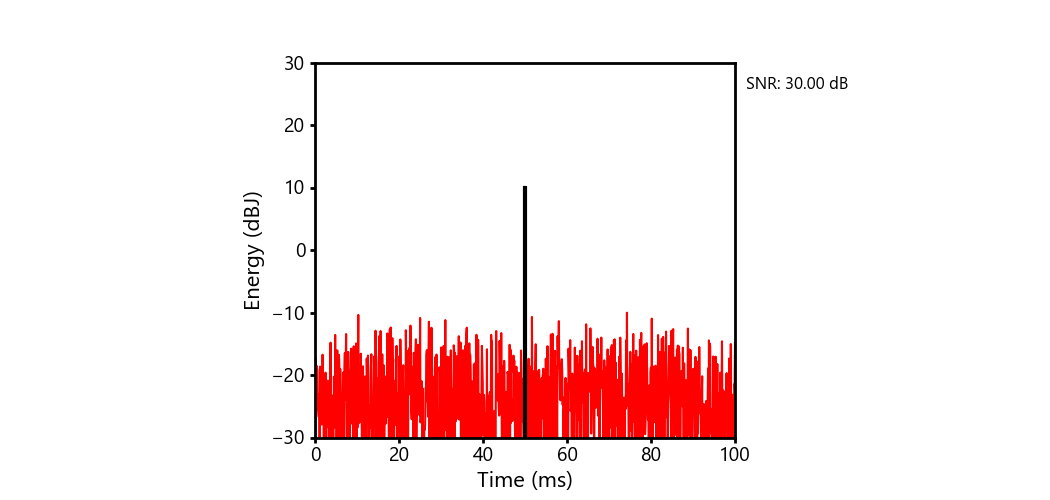

In [4]:
ex.ex_2_1_2()

***

### Question 1

**(a)** What is the SNR if the true received signal has an energy of $100~\mathrm{J}$, and the average noise energy is $5.3~\mathrm{J}$?

In [5]:
qz.quiz_2_1_1a()

In [6]:
# Scratch space

**(b)** If the SNR of a signal is measured to be $15~\mathrm{dB}$ and the average noise energy is known to be $2.2~\mathrm{J}$, what is the signal energy?

In [7]:
qz.quiz_2_1_1b()

In [8]:
# Scratch space

***

We can now focus on trying to derive the SNR of a target echo for a radar system; this will be prove to be incredibly useful in basic radar design. Fair warning: this will be the most math-heavy portion of the course.

## Radar Range Equation

One of the basic tools in radar design is called the **radar range equation**, which derives the signal-to-noise ratio of a radar system as a function of high-level parameters, e.g., transmit energy, transmit frequency, transmit gain, receive gain. In this section, we will step through its derivation together. To begin, we will start with a more general result applying to all electromagnetic transmissions and receptions.

### Energy and Instantaneous Power

Before we get to the evolution of a radar transmission through space, we need to first dive a little deeper into electromagnetic emissions. As discussed in [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), a radar transmits a pulse of electromagnetic energy and listens for echoes reflected by targets. It creates the pulse by using a controlled electrical current to drive an antenna and generate a radiated electric field; the converted energy is then contained in the electric field wave as it propagates through space. 

The electrical signal used to generate the propagated wave is commonly called the **waveform** and is often defined as a voltage with units of volts ($\mathrm{V}$). We can see a sinusoidal waveform in the figure below:

<div style="text-align: center"> <img src="img/waveform.png" justify="center" width="600px"></img> </div>

Design of radar waveforms will be discussed in [Lab 3.1: Radar Transmissions and Receptions](3_1_Radar_Transmissions_and_Receptions.ipynb).

Once the wave has been generated by the antenna, it is now an electric field as it moves through space; electric fields are measured in units of volts per meter ($\mathrm{V/m}$). Here is a snapshot in time of a sinusoidal wave (note that it is plotted versus range):

<div style="text-align: center"> <img src="img/wave.png" justify="center" width="600px"></img> </div>

Now, to study the energy imparted to the target by a wave, we can study the **instantaneous power** of the wave<sup>[2](#foot_power)</sup>, $P$ , which quantifies the rate of energy transfer contained in a short segment of the wave; power is measured in watts ($\mathrm{W}$). Put another way: the amount of energy transferred by a wave segment with instantaneous power $P$ and duration $\epsilon$ is approximately $\mathcal{E} = P \cdot \epsilon$. The instantaneous power of the sinusoidal wave above is shown the figure below:

<div style="text-align: center"> <img src="img/power.png" justify="center" width="550px"></img> </div>

The total energy, $\mathcal{E}$ , in the wave can be obtained by partitioning the entire wave into small segments and then adding up the energy contributions from each segment over the duration of the wave. (Mathematically, this is expressed as an integral.)

Since we are interested in the received energy, $\mathcal{E}_r$ , from a target transmission, we will first derive the received power, $P_r$ , due to a small segment of the transmitted pulse. Then, we will sum all of the contributions from the different segments on the pulse to obtain the total received energy, $\mathcal{E}_r$.

### Friis Transmission Equation

To see how the power of the transmit wave segment varies on its way to and from the target, we will use **Friis transmission equation**<sup>[[1]](#ref_friis)</sup>. In fact, our final answer for this section will simply be two applications of the Friis transmission equation (with a slight variation at the end).

The Friis transmission equation derives how much instantaneous power is transferred from a transmit aperture to a receive aperture at a different location. The system setup is illustrated in the following figure:

<div style="text-align: center"> <img src="img/friis_0.png" justify="center" width="600px"></img></div>

Consider focusing in on a small segment of the transmitted wave whose instantaneous power at time of transmission is $P_t$ (see figures below). 

<div style="text-align: center"> <img src="img/wave_seg.png" justify="center" width="340px"></img> <img src="img/power_seg.png" justify="center" width="350px"></img></div>

As the short segment propagates into space, it spreads out in all directions on a spherical shell of energy characterized by a **power density** (denoted as $\rho$); a *power density* tells us how much power a receive aperture would accumulate *per unit area*. For instance, if a receive aperture has an area $A_r = 2~\mathrm{m^2}$ and it observes an incoming wave segment with a transmitted power density of $\rho = 10~\mathrm{W/m^2}$, then it will garner a received instantaneous power of 

$$
\begin{align}
P_r &= A_r \cdot \rho\\
&= 20~\mathrm{W}
\end{align}
$$  

In the following figure, we can now see the power density due to the transmitted wave segment.

<div style="text-align: center"> <img src="img/friis_1.png" justify="center" width="600px"></img></div>

To derive an expression for the power density, we first note that the energy (and instantaneous power) of transmission has to be conserved as it spreads out in space as a spherical shell. Thus, if we were to add up all of the power on the shell, it should equal the original power of the wave segment. Noting that the surface area of a sphere of radius $r$ is $S = 4\pi r^2$, this means the transmitted power density, $\rho_t$ , should be of the form:

$$
\begin{align}
\rho_t &= \frac{P_t}{S}\\
&= \frac{P_t}{4\pi r^2}
\end{align}
$$

where $S$ is the surface area of the sphere. Note that division by the surface area of a sphere is exactly the *propagation loss* referred to in [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), just now in mathematical form. We can revisit the interactive example showing how the amplitude (and, thus, instantaneous power) of the wave diminishes as it travels outward from the transmit aperture:

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=50.0, de…

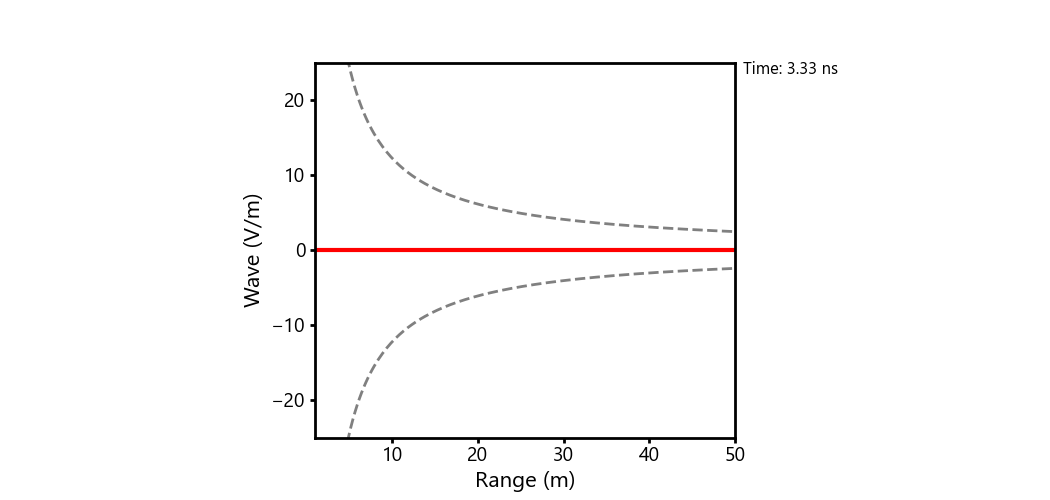

In [9]:
ex.ex_2_1_3()

Now, the last thing to note is that since transmission uses an aperture, it will concentrate its energy in a direction characterized by its transmit gain, $G_t(\theta)$. Recalling from [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), the energy in azimuth angle $\theta$ is $\mathcal{E}_t G_t(\theta)$, which means its power in that direction is $P_t G_t(\theta)$. Therefore, accounting for the transmit gain, the transmitted power density, $\rho_t$, at range $r$ due to a wave segment is

$$
\rho_t = \frac{P_t G_t(\theta)}{4 \pi r^2}
$$

Finally, if we let the receive aperture have an area of $A_r$ and it is at a range $r$ from the transmit aperture, the total received power, $P_r$, is

$$
\begin{align}
P_r &= A_r \cdot \rho_t\\
&= \frac{P_t G_t(\theta) A_r}{4 \pi r^2}
\end{align}
$$

This equation is known as the Friis transmission equation:

$$
P_r = \frac{P_t G_t(\theta) A_r}{4 \pi r^2}
$$

It tells use how much power can be aggregated by a received aperture of area $A_r$ at range $r$ and angle $\theta$ from a transmit aperture with transmit power $P_t$ and transmit gain $G_t(\theta)$.

The following interactive example shows how the received power, $P_r$ , varies using transmissions from a dish radar with selectable parameters. Note the plot shows received power, $P_r$ , as a function of range, $r$ , and receive aperture area, $A_r$. Receive aperture area is shown in $\mathrm{dBsm}$, which is the decibel version of square meters ($\mathrm{m^2}$).

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

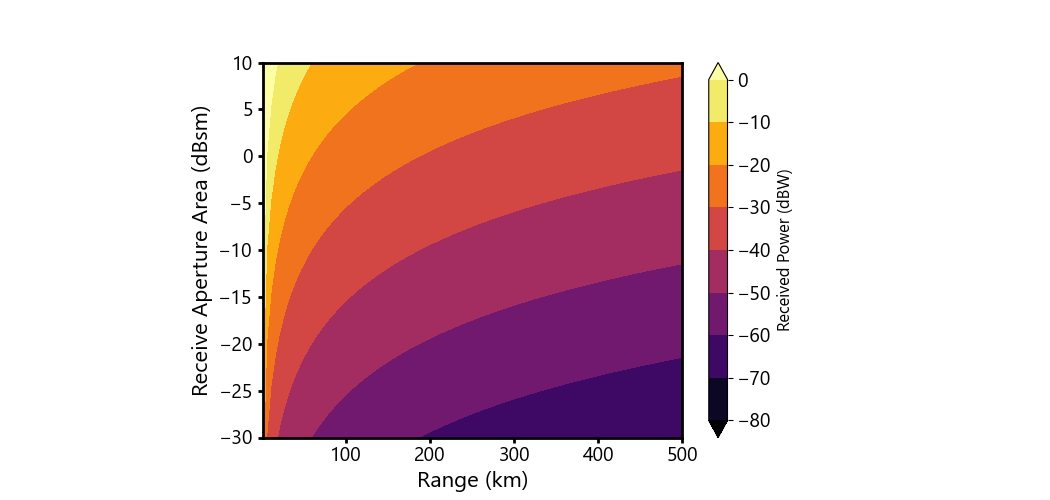

In [10]:
ex.ex_2_1_4()

From the example, we can see the received power *increases* with:

* Increasing receive aperture area, $A_r$, due to more accumulated power
* Transmit frequency, $f$, due to higher transmit and receive gain
* Dish radius, due to higher transmit and receive gain


***

### Question 2

**(a)** What is the received power, $P_r$ , for a receive aperture of area $A_r = 10~\mathrm{m^2}$ at range $r = 50~\mathrm{km}$ for a transmission with power $P_t =10~\mathrm{kW}$ and transmit gain of $G_t(\theta)=35~\mathrm{dB}$?

In [11]:
qz.quiz_2_1_2a()

In [12]:
# Scratch space

**(b)** If the transmit power is $P_t = 100~\mathrm{kW}$ and transmit frequency is $f = 3.5~\mathrm{GHz}$, what transmit dish radius is needed to achieve a received power of $P_r = 1~\mathrm{W}$ with an receive aperture at range $r = 10~\mathrm{km}$ and aperture area $A_r = 5~\mathrm{m^2}$?

In [13]:
qz.quiz_2_1_2b()

In [14]:
# Scratch space

***

Now, we will use the Friis transmission equation to derive the received echo power at the radar resulting from a transmission wave segment. More specifically, we are going to trace the path followed by this chosen segment from its origin at transmit, to the target, and back to the radar—this is broken into two applications of the equation:
* Power that a target sees from a transmission
* Received power after the target reflects the transmission

### Incident Power at Target

From the derivation of the Friis transmission equation, we know that the instantaneous power density of the transmitted wave segment at the target, $\rho_t$ , for a radar with transmit gain $G_t(\theta)$ is

$$
\rho_t = \frac{P_t G_t(\theta)}{4\pi r^2}
$$

Thus, if the target is at range $r$ (where it is assumed that the range is much greater than the size of the target) and azimuth angle $\theta$, it sees the transmission as an incoming wall of electromagnetic energy (commonly called a *plane wave*) with power density $\rho_t$. 

The next question to answer is how much energy is captured by the target and reflected back toward the radar. This relationship is quantified by a target's **radar cross section** (RCS), $\sigma$ , which is a measure of a target's ability to reflect power back in the direction of the receiving sensor. As a means of simplifying target description, it is modeled as having a hypothetical receive aperture that collects an incoming wave over a certain area and then immediately retransmits the aggregated power equally in every direction (see figure below). The *<font color="BlueViolet">area of the hypothetical receive aperture is its radar cross section</font>*; because it a measure of area, its unit are in square meters ($\mathrm{m}^2$) and is commonly presented using its decibel analog, $\mathrm{dBsm}$.

<div style="text-align: center"> <img src="img/rcs_model.png" justify="center" width="450px"></img> </div>

Roughly, the larger a target, the larger its RCS; however, it is important to note that RCS does not necessarily have a direct relationship with the actual physical area of the target; for example, stealth planes are quite large, but their design is chosen to minimize RCS. The larger the RCS, the stronger the echo, and the more detectable an object is. 

Using the definition of RCS, $\sigma$ , and the Friis transmission equation, the amount of instantaneous power incident on the target, $P_i$ , is:

$$
\begin{align}
P_i &= \rho_t \cdot \sigma\\
&= \frac{P_t G_t(\theta)\sigma}{4\pi r^2}
\end{align}
$$

***

### Question 3

**(a)** What is the incident power, $P_i$ , at a target of range $r = 50~\mathrm{km}$ and radar cross section $\sigma = 5~\mathrm{dBsm}$, if the originating radar has transmit gain $G_t(\theta) = 30~\mathrm{dB}$ and transmit power $P_t = 150~\mathrm{kW}$?

In [15]:
qz.quiz_2_1_3a()

In [16]:
# Scratch space

**(b)** If a radar has a transmit gain of $G_t(\theta) = 25~\mathrm{dB}$, transmit power of $P_t = 500~\mathrm{kW}$, and incident power of a target with RCS $\sigma = 0~\mathrm{dBsm}$ is $P_i = 0.1~\mathrm{mW}$, what is the range, $r$ , of the target?

In [17]:
qz.quiz_2_1_3b()

In [18]:
# Scratch space

***

### Received Power at Radar

Due to how the target is modeled using the RCS, the reflected power sent back toward the radar is the same as the incident power, $P_i$. Now, we can use the the fact that the target has unit gain (reradiates in all directions equally), the area of the radar receive aperture, $A_r$ , and the Friis transmission equation one more time and get the received power, $P_r$ , due to the reflected wave segment:

$$
\begin{align}
P_r &= \frac{P_i A_r}{4\pi r^2}
\end{align}
$$

Substituting in the form of the incident power, $P_i$ , derived above:

$$
P_r =\frac{P_t G_t(\theta) \sigma A_r}{(4\pi)^2 r^4}
$$

This is very close to what we want: received echo power as a function of radar transmit parameters. However, there is one more small manipulation that makes it more practical to use. It turns out that the area of the receive aperture that is used in this equation is typically not equal to the *actual* geometric area due to realistic imperfections in the system. Due to this, it is easier to create a form that depends on receive gain, $G_r(\theta)$ , (much easier to measure practically) than receive aperture area, $A_r$. This is done by introducing the idea of an **effective aperture area**, $A_e$ , which is the aperture area that would achieve a known gain value. 

From [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we know that the receive gain, $G_r(\theta)$ , of an aperture is related to the receive aperture area, $A_r$ , by:

$$
G_r(\theta) \leq \frac{4\pi A_r}{\lambda^2}
$$

where $\lambda$ is the transmit wavelength. Making it an equality and rearranging the formula, we can solve for the effective aperture area, $A_e(\theta)$ , as:

$$
A_e(\theta)=\frac{G_r(\theta)\lambda^2}{4\pi}
$$

Now, we can replace the receive aperture area, $A_r$ , with the effective received aperture area, $A_e(\theta)$ , in the received power, $P_r$ , formula above to obtain:

$$
\begin{align}
P_r &= \frac{P_t G_t(\theta) \sigma A_e(\theta)}{(4\pi)^2 r^4}\\
&= \frac{P_t G_t(\theta) G_r(\theta)\lambda^2\sigma}{(4\pi)^3 r^4}
\end{align}
$$

The last equation is the **received power form** of the **radar range equation**:

$$
P_r = \frac{P_t G_t(\theta) G_r(\theta)\lambda^2\sigma}{(4\pi)^3 r^4}
$$

In the following example, we can see how the received power scales for a dish radar system:

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

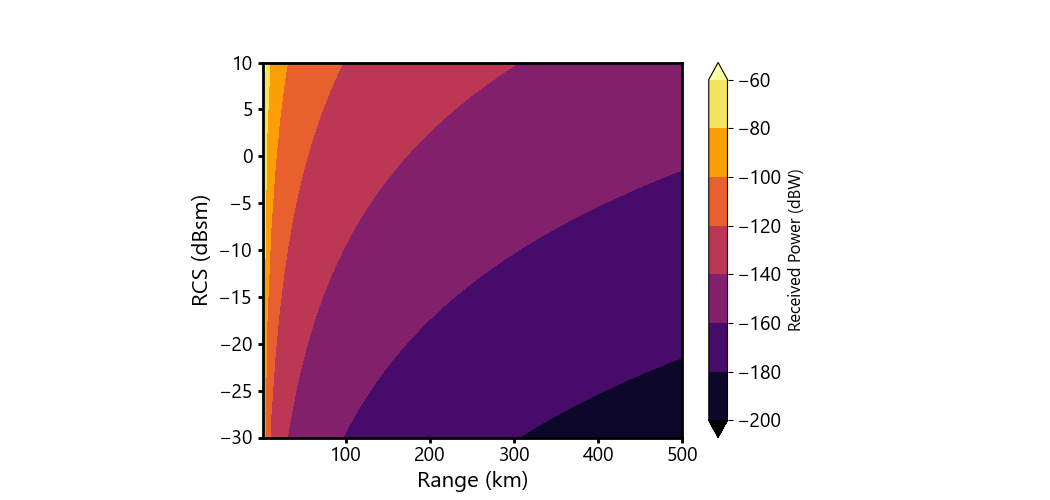

In [19]:
ex.ex_2_1_5()

Similar to the example used in illustrating the Friis transmission equation, we can see the received power *increases* with:

* Increasing target RCS, $\sigma$, due to more reflected power
* Transmit frequency, $f$, due to higher transmit and receive gain
* Dish radius, due to higher transmit and receive gain

We can also notice how small the power is that is received by a radar system; the value of $P_r = -120~\mathrm{dBW} = 10^{-12}~\mathrm{W}$, which is one *picowatt* of power.

To obtain the total received energy, $\mathcal{E}_r$ , due to the entire transmitted wave, we can note that each segment of the transmit waveform will travel the same path, and, thus, experience the same scaling by propagation loss, transmit gain, receive gain, etc. Thus, adding all contributions from transmit wave segments, will give us the **received energy form** of the **radar range equation**:

$$
\mathcal{E}_r = \frac{\mathcal{E}_t G_t(\theta) G_r(\theta)\lambda^2\sigma}{(4\pi)^3 r^4}
$$

The following interactive example shows how received energy scales with dish radar parameters: 

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

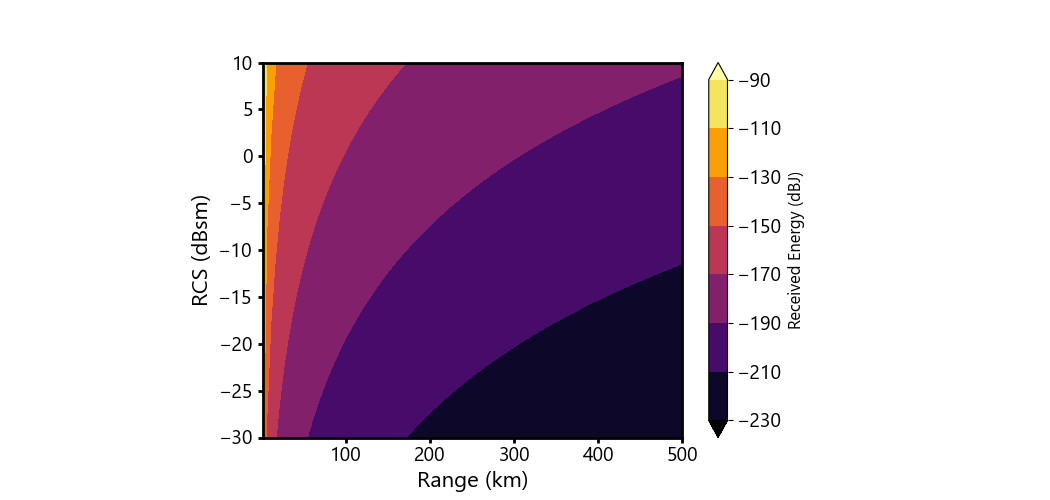

In [20]:
ex.ex_2_1_6()

***

### Question 4

**(a)** What is the received power, $P_r$ , from a target echo with a target at range $r = 100~\mathrm{km}$ and RCS $\sigma = 5~\mathrm{dBsm}$ when using a transmit power of $P_t = 600~\mathrm{kW}$, transmit and receive gain of $G_t(\theta) = G_r(\theta) = 40~\mathrm{dB}$ and transmit frequency $f = 3~\mathrm{GHz}$?

In [21]:
qz.quiz_2_1_4a()

In [22]:
# Scratch space

**(b)** If the transmit frequency of a radar is $f = 1.3~\mathrm{GHz}$ and the receive gain is $G_r(\theta) = 24.3~\mathrm{dB}$, what is the effective aperture area, $A_e(\theta)$?

In [23]:
qz.quiz_2_1_4b()

In [24]:
# Scratch space

**(c)** What is the radar cross section, $\sigma$ , of a target at range $r = 10~\mathrm{km}$ away from a radar with transmit energy of $\mathcal{E}_t = \mathrm{30~J}$, transmit frequency $f = 1.5~\mathrm{GHz}$, and a transmit and receive gain of $G_t(\theta) = G_r(\theta) = 40~\mathrm{dB}$ if the received energy is $\mathcal{E}_r = 10~\mathrm{pJ}$?

In [25]:
qz.quiz_2_1_4c()

In [26]:
# Scratch space

***

### Average Noise Energy

Fortunately, average noise energy, $\mathcal{E}_n$ , is much easier to derive than the received energy, $\mathcal{E}_r$ . Radar system designs commonly model the aggregate noise due to multiple sources as arising from a single thermal source. In this case, the level of noise in a radar system is completely described by a **system noise temperature**, $T_s$. The higher the noise temperature, the stronger the noise in the system. More specifically, the noise energy term is defined as:

$$
\mathcal{E}_n = kT_s
$$

where $k$ is the Boltzmann constant $1.38064852 \times 10^{-23}~\mathrm{J/^\circ K}$, $T_s$ is the system noise temperature ($^\circ\mathrm{K}$). Note that you can use the Boltzmann constant in your calculations as `k`.

***

### Question 5

For a radar with system noise temperature $T_s = 722~ ^\circ\mathrm{K}$, what is the average noise energy, $\mathcal{E}_n$?

In [27]:
qz.quiz_2_1_5()

In [28]:
# Scratch space

***

### Radar Signal-to-Noise Ratio

Taking both $\mathcal{E}_r$ and $\mathcal{E}_n$, we can now derive the **signal-to-noise ratio form** of the **radar range equation**:

$$
\mathrm{SNR} = \frac{\mathcal{E}_r}{\mathcal{E}_n} = \frac{\mathcal{E}_t G_t(\theta) G_r(\theta)\lambda^2\sigma}{(4\pi)^3 r^4 k T_s}
$$

Traditionally, you may see a loss term $L$ included in the denominator, where $L$ is a unitless term that represents total system loss, which is comprised of atmospheric loss, signal processing loss, transmit loss, and many other real-world factors.

In the interactive example below, we can study how the signal-to-noise ratio varies with radar parameters:

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

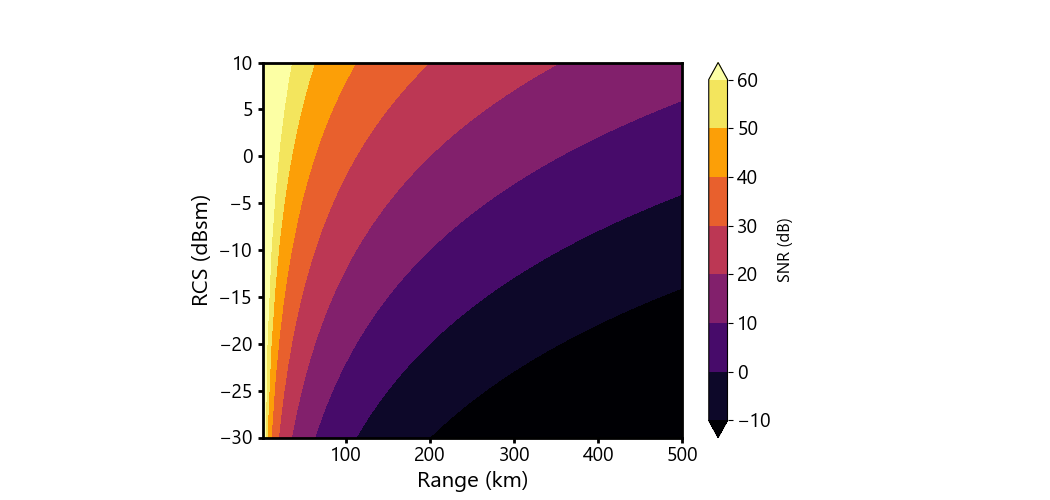

In [29]:
ex.ex_2_1_7()

***

### Question 6

What is the signal-to-noise ratio from a target echo with a target at range $r = 200~\mathrm{km}$ and RCS $\sigma = -5~\mathrm{dBsm}$ when using a radar with transmit energy of $\mathcal{E}_t = 50~\mathrm{J}$, transmit and receive gain of $G_t(\theta) = G_r(\theta) = 35~\mathrm{dB}$, system noise temperature $T_s = 750^\circ K$, and transmit frequency $f = 5~\mathrm{GHz}$?

In [30]:
qz.quiz_2_1_6()

In [31]:
# Scratch space

***

Returning to the beginning of this lab, we can study the general problem of detection of an echo with varying radar parameters. In the following example, we will see the echo against a noise background. As the parameters of the radar are varied, we can watch the evolution of the noise energy, signal energy, and the signal-to-noise ratio.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Radar</b>"), FloatSlider(value=400.0, desc…

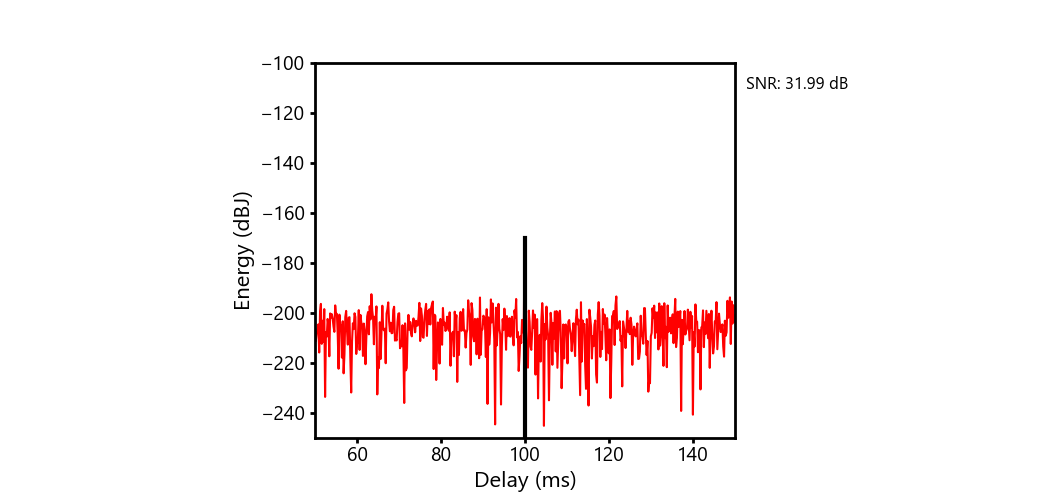

In [32]:
ex.ex_2_1_8()

## Reference SNR

As we can see from the signal-to-noise ratio form of the radar range equation, there are quite a few radar variables to keep track of:

- Transmit energy, $\mathcal{E}_t$
- Transmit gain, $G_t(\theta)$
- Receive gain, $G_r(\theta)$
- Transmit wavelength, $\lambda$
- System noise temperature, $T_s$

Instead of keeping all of these values at the ready, a radar system is often summarized by a **reference SNR**, which assumes a predefined transmit wavelength and maximum gain values. A reference SNR is often in the following form: SNR of $\mathrm{SNR}_0$ on a target with RCS $\sigma_0$ at range $r_0$. For instance, a radar could have achieve an SNR of $\mathrm{SNR}_0 = 15~\mathrm{dB}$ on a target with RCS $\sigma_0 = -5~\mathrm{dBsm}$ at range $r_0 = 100~\mathrm{km}$.

The main advantage of knowing the reference SNR is that is can be quickly converted to other target ranges and radar cross sections. More specifically, the SNR of a target with RCS $\sigma$ at range $r$ is:

$$
\mathrm{SNR} = \mathrm{SNR}_0 \cdot \left(\frac{r_0}{r}\right)^4 \cdot \left(\frac{\sigma}{\sigma_0}\right)
$$

So, if we know $\mathrm{SNR}_0$ , $\sigma_0$ , and $r_0$ , we can quickly calculate the SNR value for other targets and ranges.

***

### Question 7

If a radar achieves a signal-to-noise ratio of $\mathrm{SNR}_0 = 17~\mathrm{dB}$ for a target at $r_0 = 75~\mathrm{km}$ with radar cross section $\sigma_0 = -10~\mathrm{dBsm}$, what is the signal-to-noise ratio for the same radar with a target at range $r = 50~\mathrm{km}$ and radar cross section $\sigma = -15~\mathrm{dBsm}$?

In [33]:
qz.quiz_2_1_7()

In [34]:
# Scratch space

***

## Summary

In this lab, we learned the intuitive connection between the ability to confidently detect the presence of a target echo and its *signal-to-noise ratio* (SNR). Then, we derived the form of the signal-to-noise ratio for a radar system using two applications of the *Friis transmission equation*. This creates three useful forms of the *radar range equation*: *received power*, *received energy*, and *signal-to-noise ratio*. These quantities were then investigated for a dish radar system with adjustable parameters. Finally, we introduced the convenient notion of a *reference SNR* that can be used to summarize a radar's performance and allow for quick calculation for other targets and ranges.

## Footnotes

<a id="foot_snr"><sup>1</sup></a>This is the common definition for signals with a limited time duration; for signals that are infinitely long, the terms on top and bottom will be replaced by power instead of energy.
    
<a id="foot_power"><sup>2</sup></a>Electromagnetic waves are typically described using their electric field strength $E(r, t)$ where $r$ is range and $t$ is time. To convert to power density at a specific point, we can use the formula:

$$
P(x, t) = \frac{|E(r, t)|^2}{\eta}
$$

where $\eta = 367.73~\Omega$ is the natural impedance of free space.

## References

<a id="ref_friis">[1]</a> H. Friis, "A note on a simple transmission formula", *Proceedings of the IRE*, vol. 34, no. 5, pp. 254-256, May 1946.